In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
from IPython.display import Image
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.datasets import make_classification;

import scipy.stats as stats

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
ls datasets #find the location of the data file

 Volume in drive C is Windows
 Volume Serial Number is 283D-E715

 Directory of C:\Users\einst_000\DS-SF-36\classes\datasets

08/07/2017  06:40 PM    <DIR>          .
08/07/2017  06:40 PM    <DIR>          ..
08/07/2017  06:40 PM            86,413 dataset-13-walget-train.csv
               1 File(s)         86,413 bytes

 Directory of C:\Users\einst_000\DS-SF-36\classes


 Directory of C:\Users\einst_000\DS-SF-36\classes


 Directory of C:\Users\einst_000\DS-SF-36\classes


 Directory of C:\Users\einst_000\DS-SF-36\classes


 Directory of C:\Users\einst_000\DS-SF-36\classes


 Directory of C:\Users\einst_000\DS-SF-36\classes


 Directory of C:\Users\einst_000\DS-SF-36\classes



File Not Found


In [3]:
#read the dataset
df = pd.read_csv(os.path.join('datasets', 'dataset-13-walget-train.csv')) 

In [4]:
df

,AccountHolderImpliedGender,AccountHolderAddress,RecentlyPurchasedPregnancyTest,RecentlyPurchasedBirthControl,RecentlyPurchasedFeminineHygieneProducts,...,RecentlyPurchasedSmokingCessationProducts,PurchasedWineRegularlyUntilRecentlyThenStopped,RecentlyPurchasedWine,RecentlyPurchasedMaternityClothing,IsPregnant
0,Female,Home,False,False,NaN,...,False,True,False,False,True
1,Female,PO Box,False,False,False,...,False,False,False,False,True
2,Male,Apartment,False,True,False,...,False,False,False,False,False
3,Male,Home,False,False,False,...,False,False,False,False,True
4,Female,PO Box,False,False,False,...,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
595,Male,Home,False,False,False,...,NaN,False,False,False,False
596,Female,Home,True,False,False,...,False,False,False,False,True
597,Male,Apartment,False,False,False,...,False,False,False,False,True
598,Male,Home,False,False,False,...,False,False,False,False,True


In [5]:
# see the shape of the dataset
df.shape

(600, 18)

In [6]:
df.describe()

,AccountHolderImpliedGender,AccountHolderAddress,RecentlyPurchasedPregnancyTest,RecentlyPurchasedBirthControl,RecentlyPurchasedFeminineHygieneProducts,...,RecentlyPurchasedSmokingCessationProducts,PurchasedWineRegularlyUntilRecentlyThenStopped,RecentlyPurchasedWine,RecentlyPurchasedMaternityClothing,IsPregnant
count,542,594,594,593,590,...,588,588,592,597,600
unique,2,3,2,2,2,...,2,2,2,2,2
top,Female,Home,False,False,False,...,False,False,False,False,True
freq,301,295,549,516,502,...,550,510,528,519,300


In [7]:
# see header
df.columns.tolist() 

['AccountHolderImpliedGender',
 'AccountHolderAddress',
 'RecentlyPurchasedPregnancyTest',
 'RecentlyPurchasedBirthControl',
 'RecentlyPurchasedFeminineHygieneProducts',
 'RecentlyPurchasedFolicAcidSupplements',
 'RecentlyPurchasedPrenatalVitamins',
 'RecentlyPurchasedPrenatalYogaDVD',
 'RecentlyPurchasedBodyPillow',
 'RecentlyPurchasedGingerAle',
 'RecentlyPurchasedSeaBands',
 'PurchasedCigarettesRegularlyUntilRecentlyThenStopped',
 'RecentlyPurchasedCigarettes',
 'RecentlyPurchasedSmokingCessationProducts',
 'PurchasedWineRegularlyUntilRecentlyThenStopped',
 'RecentlyPurchasedWine',
 'RecentlyPurchasedMaternityClothing',
 'IsPregnant']

In [8]:
#find out all the null data
df.isnull().sum()

AccountHolderImpliedGender                        58
AccountHolderAddress                               6
RecentlyPurchasedPregnancyTest                     6
RecentlyPurchasedBirthControl                      7
RecentlyPurchasedFeminineHygieneProducts          10
                                                  ..
RecentlyPurchasedSmokingCessationProducts         12
PurchasedWineRegularlyUntilRecentlyThenStopped    12
RecentlyPurchasedWine                              8
RecentlyPurchasedMaternityClothing                 3
IsPregnant                                         0
Length: 18, dtype: int64

In [9]:
#drop the null data
df_d = df.dropna()

In [10]:
#check if there is any null data. 
df_d.isnull().sum().sum()
#seems no more null data

0L

In [11]:
df_d.shape
# the null data have been droped

(446, 18)

In [12]:
df = df_d

In [13]:
df['IsPregnant'].value_counts()

False    224
True     222
Name: IsPregnant, dtype: int64

In [14]:
df = df.drop(["AccountHolderImpliedGender", "AccountHolderAddress"], axis = 1)

In [15]:
df = df.astype(int) 
df.head()

,RecentlyPurchasedPregnancyTest,RecentlyPurchasedBirthControl,RecentlyPurchasedFeminineHygieneProducts,RecentlyPurchasedFolicAcidSupplements,RecentlyPurchasedPrenatalVitamins,...,RecentlyPurchasedSmokingCessationProducts,PurchasedWineRegularlyUntilRecentlyThenStopped,RecentlyPurchasedWine,RecentlyPurchasedMaternityClothing,IsPregnant
1,0,0,0,0,0,...,0,0,0,0,1
2,0,1,0,0,0,...,0,0,0,0,0
3,0,0,0,0,1,...,0,0,0,0,1
4,0,0,0,0,0,...,0,0,0,0,0
5,0,1,0,0,0,...,0,0,0,0,0


In [16]:
col = [i for i in df.columns]
df[[str(i) for i in col]].sum()

RecentlyPurchasedPregnancyTest                     35
RecentlyPurchasedBirthControl                      60
RecentlyPurchasedFeminineHygieneProducts           68
RecentlyPurchasedFolicAcidSupplements              47
RecentlyPurchasedPrenatalVitamins                  62
                                                 ... 
RecentlyPurchasedSmokingCessationProducts          32
PurchasedWineRegularlyUntilRecentlyThenStopped     56
RecentlyPurchasedWine                              49
RecentlyPurchasedMaternityClothing                 66
IsPregnant                                        222
Length: 16, dtype: int64

In [17]:
df.corr()

,RecentlyPurchasedPregnancyTest,RecentlyPurchasedBirthControl,RecentlyPurchasedFeminineHygieneProducts,RecentlyPurchasedFolicAcidSupplements,RecentlyPurchasedPrenatalVitamins,...,RecentlyPurchasedSmokingCessationProducts,PurchasedWineRegularlyUntilRecentlyThenStopped,RecentlyPurchasedWine,RecentlyPurchasedMaternityClothing,IsPregnant
RecentlyPurchasedPregnancyTest,1.000000,-0.066182,-0.100578,0.117082,0.123743,...,0.177330,0.115883,-0.075860,0.089712,0.259779
RecentlyPurchasedBirthControl,-0.066182,1.000000,0.070413,-0.092513,-0.025467,...,-0.058688,-0.089905,0.050599,-0.108793,-0.326785
RecentlyPurchasedFeminineHygieneProducts,-0.100578,0.070413,1.000000,-0.084627,-0.026195,...,-0.093750,-0.066601,0.010554,-0.036235,-0.272544
RecentlyPurchasedFolicAcidSupplements,0.117082,-0.092513,-0.084627,1.000000,0.030951,...,0.102652,0.156441,-0.097226,0.062618,0.344755
RecentlyPurchasedPrenatalVitamins,0.123743,-0.025467,-0.026195,0.030951,1.000000,...,0.013852,0.062887,-0.078994,0.088068,0.286966
...,...,...,...,...,...,...,...,...,...,...,...
RecentlyPurchasedSmokingCessationProducts,0.177330,-0.058688,-0.093750,0.102652,0.013852,...,1.000000,0.104410,-0.042109,0.079877,0.227140
PurchasedWineRegularlyUntilRecentlyThenStopped,0.115883,-0.089905,-0.066601,0.156441,0.062887,...,0.104410,1.000000,-0.133126,0.051701,0.285901
RecentlyPurchasedWine,-0.075860,0.050599,0.010554,-0.097226,-0.078994,...,-0.042109,-0.133126,1.000000,-0.065646,-0.263710
RecentlyPurchasedMaternityClothing,0.089712,-0.108793,-0.036235,0.062618,0.088068,...,0.079877,0.051701,-0.065646,1.000000,0.292337


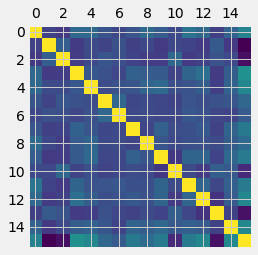

In [18]:
plt.matshow(df.corr())

In [19]:
model = smf.ols(formula = 'IsPregnant ~ RecentlyPurchasedPregnancyTest' , data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             IsPregnant   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     32.13
Date:                Mon, 07 Aug 2017   Prob (F-statistic):           2.60e-08
Time:                        20:17:43   Log-Likelihood:                -308.12
No. Observations:                 446   AIC:                             620.2
Df Residuals:                     444   BIC:                             628.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.4599      0.024     19.265      0.000       0.413       0.507
RecentlyPurchasedPregnancyTest     0.4830      0.085      5.668      0.000       0.316       0.650
==============================================================================
Omnibus:                        1.287   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.525   Jarque-Bera (JB):               65.649
Skew:                           0.130   Prob(JB):                     5.55e-15
Kurtosis:                       1.139   Cond. No.                         3.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model = smf.ols(formula = 'IsPregnant ~ RecentlyPurchasedPregnancyTest + RecentlyPurchasedBirthControl + RecentlyPurchasedFeminineHygieneProducts + RecentlyPurchasedFolicAcidSupplements + RecentlyPurchasedPrenatalVitamins + RecentlyPurchasedPrenatalYogaDVD + RecentlyPurchasedBodyPillow + RecentlyPurchasedGingerAle + RecentlyPurchasedSeaBands + PurchasedCigarettesRegularlyUntilRecentlyThenStopped + RecentlyPurchasedCigarettes + RecentlyPurchasedSmokingCessationProducts + PurchasedWineRegularlyUntilRecentlyThenStopped + RecentlyPurchasedWine + RecentlyPurchasedMaternityClothing' , data = df).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             IsPregnant   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     29.86
Date:                Mon, 07 Aug 2017   Prob (F-statistic):           2.57e-57
Time:                        20:17:43   Log-Likelihood:                -164.54
No. Observations:                 446   AIC:                             361.1
Df Residuals:                     430   BIC:                             426.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                                0.4082      0.027     14.866      0.000       0.354       0.462
RecentlyPurchasedPregnancyTest                           0.1836      0.066      2.798      0.005       0.055       0.313
RecentlyPurchasedBirthControl                           -0.3198      0.051     -6.315      0.000      -0.419      -0.220
RecentlyPurchasedFeminineHygieneProducts                -0.2343      0.048     -4.870      0.000      -0.329      -0.140
RecentlyPurchasedFolicAcidSupplements                    0.3468      0.057      6.110      0.000       0.235       0.458
RecentlyPurchasedPrenatalVitamins                        0.2936      0.050      5.878      0.000       0.195       0.392
RecentlyPurchasedPrenatalYogaDVD                         0.3394      0.122      2.790      0.005       0.100       0.579
RecentlyPurchasedBodyPillow                              0.2353      0.138      1.710      0.088      -0.035       0.506
RecentlyPurchasedGingerAle                               0.2595      0.070      3.725      0.000       0.123       0.396
RecentlyPurchasedSeaBands                                0.1661      0.096      1.738      0.083      -0.022       0.354
PurchasedCigarettesRegularlyUntilRecentlyThenStopped     0.1182      0.062      1.909      0.057      -0.004       0.240
RecentlyPurchasedCigarettes                             -0.1606      0.054     -2.977      0.003      -0.267      -0.055
RecentlyPurchasedSmokingCessationProducts                0.2122      0.068      3.143      0.002       0.080       0.345
PurchasedWineRegularlyUntilRecentlyThenStopped           0.2050      0.053      3.885      0.000       0.101       0.309
RecentlyPurchasedWine                                   -0.2376      0.055     -4.308      0.000      -0.346      -0.129
RecentlyPurchasedMaternityClothing                       0.2507      0.049      5.131      0.000       0.155       0.347
==============================================================================
Omnibus:                       66.037   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.674
Skew:                           0.184   Prob(JB):                     8.81e-05
Kurtosis:                       2.067   Cond. No.                         9.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#Create X and y variables
X = df.drop("IsPregnant", axis=1)
y = df.IsPregnant

#Intialize, fit, and score the model
lr = LogisticRegression()

lr.fit(X,y)

score = lr.score(X,y)

print ("The model produces an accuracy score of {:.2f} percent".format(score*100))

The model produces an accuracy score of 87.22 percent


In [22]:
#Find the null accuracy aka the benchmark score
y.value_counts(normalize=True)

0    0.502242
1    0.497758
Name: IsPregnant, dtype: float64

In [25]:
#Step 1
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4,
                                                    random_state=42)
#Step 2
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Step 3
preds = lr.predict(X_test)

#Step 4
testing_score = accuracy_score(y_test, preds)

print ("The model accurately classified {:.2f} percent of the testing data".format(testing_score*100))

The model accurately classified 86.59 percent of the testing data


In [24]:
#Use cross_val_score method to generate the average accuracy score for 5 CVs
mean_cv_score = cross_val_score(LogisticRegression(), X,y, cv=5, scoring="accuracy").mean()

# print ("The cross validated accuracy score is {:.2f} percent").format(mean_cv_score*100)

The cross validated accuracy score is 85.64 percent


In [26]:
cross_val_score(LogisticRegression(), X,y, cv=5, scoring="accuracy")

array([ 0.9       ,  0.86666667,  0.83146067,  0.83146067,  0.85227273])

In [28]:
X2 = X.drop("RecentlyPurchasedCigarettes", axis=1)
cross_val_score(LogisticRegression(), X2,y, cv=5, scoring="accuracy").mean()

0.86308875269549434

In [29]:
X.corr()

,RecentlyPurchasedPregnancyTest,RecentlyPurchasedBirthControl,RecentlyPurchasedFeminineHygieneProducts,RecentlyPurchasedFolicAcidSupplements,RecentlyPurchasedPrenatalVitamins,...,RecentlyPurchasedCigarettes,RecentlyPurchasedSmokingCessationProducts,PurchasedWineRegularlyUntilRecentlyThenStopped,RecentlyPurchasedWine,RecentlyPurchasedMaternityClothing
RecentlyPurchasedPregnancyTest,1.000000,-0.066182,-0.100578,0.117082,0.123743,...,-0.028076,0.177330,0.115883,-0.075860,0.089712
RecentlyPurchasedBirthControl,-0.066182,1.000000,0.070413,-0.092513,-0.025467,...,-0.040857,-0.058688,-0.089905,0.050599,-0.108793
RecentlyPurchasedFeminineHygieneProducts,-0.100578,0.070413,1.000000,-0.084627,-0.026195,...,0.118004,-0.093750,-0.066601,0.010554,-0.036235
RecentlyPurchasedFolicAcidSupplements,0.117082,-0.092513,-0.084627,1.000000,0.030951,...,-0.056425,0.102652,0.156441,-0.097226,0.062618
RecentlyPurchasedPrenatalVitamins,0.123743,-0.025467,-0.026195,0.030951,1.000000,...,-0.004618,0.013852,0.062887,-0.078994,0.088068
...,...,...,...,...,...,...,...,...,...,...,...
RecentlyPurchasedCigarettes,-0.028076,-0.040857,0.118004,-0.056425,-0.004618,...,1.000000,-0.019788,-0.095494,0.073433,0.045350
RecentlyPurchasedSmokingCessationProducts,0.177330,-0.058688,-0.093750,0.102652,0.013852,...,-0.019788,1.000000,0.104410,-0.042109,0.079877
PurchasedWineRegularlyUntilRecentlyThenStopped,0.115883,-0.089905,-0.066601,0.156441,0.062887,...,-0.095494,0.104410,1.000000,-0.133126,0.051701
RecentlyPurchasedWine,-0.075860,0.050599,0.010554,-0.097226,-0.078994,...,0.073433,-0.042109,-0.133126,1.000000,-0.065646


In [30]:
from itertools import combinations

In [31]:
X.columns.shape

(15L,)

In [43]:
combs = [list(i) for i in combinations(X.columns, 3)]

In [44]:
len(combs)

455

In [55]:
scoring_dict = {}

for i in combs:
    data = X[i]
    
    score = cross_val_score(LogisticRegression(), data, y, cv=5, scoring="accuracy").mean()
    scoring_dict["_".join(i)] = score

In [111]:
feats = sorted(scoring_dict.items(), key = lambda x:x[1], reverse=True)[:100]

In [112]:
feats = [i[0] for i in feats]
# feats

In [113]:
feats2 = [i.split("_") for i in feats]

In [114]:
q = []
for i in feats2:
    q.extend(i)

In [115]:
from collections import Counter

In [120]:
good_feats = sorted(Counter(q).items(), key= lambda x:x[1], reverse=True)[:10]

In [121]:
good_feats

[('RecentlyPurchasedFolicAcidSupplements', 40),
 ('RecentlyPurchasedMaternityClothing', 40),
 ('RecentlyPurchasedPrenatalVitamins', 39),
 ('PurchasedWineRegularlyUntilRecentlyThenStopped', 33),
 ('RecentlyPurchasedBirthControl', 23),
 ('RecentlyPurchasedPregnancyTest', 20),
 ('RecentlyPurchasedGingerAle', 18),
 ('RecentlyPurchasedFeminineHygieneProducts', 18),
 ('RecentlyPurchasedSmokingCessationProducts', 18),
 ('PurchasedCigarettesRegularlyUntilRecentlyThenStopped', 17)]

In [122]:
gf = [i[0] for i in good_feats]

In [123]:
cross_val_score(LogisticRegression(), X[gf], y, cv=5, scoring="accuracy").mean()

0.85861933946203606